**Section 1: Data Setup and Initial Insights**

In this section, we set up our data by importing libraries and loading the dataset. We also provide some initial observations to understand the data better.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
# Computing descriptive statistics for the dataset
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**1.25th Percentile (Q1)**: The 25th percentile is 2013. This means that 25% of the
items in the dataset were released before or in 2013.

**2.Median (50th Percentile**): The median (middle value) release year is 2017. Half of the items in the dataset were released before 2017, and half were released after.

**3.75th Percentile (Q3)**: The 75th percentile is 2019. This indicates that 75% of the items in the dataset were released before or in 2019.

**4.Maximum (Max)**: The maximum release year is 2021, which is the most recent year in the dataset.



In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Analysis**


*   'Show_id' and 'Title' represent the unique and exclusive factors."
*   "Type" and "rating" column needs to be changed to categorical data.
*   The majority of the content is from the United States, suggesting a significant presence of American content in the dataset.



In [ ]:
# Obtaining information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.duplicated().sum() # There are no duplicate rows in the dataset.

0

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In our dataset, we have a total of 8807 entries representing movies and TV shows. Each entry corresponds to a unique show, as indicated by the "show_id" column, which contains all unique values. The "title" column also contains 8807 unique values, which aligns perfectly with the total number of entries in the dataset.

**Section 2: Data Cleaning and Addressing Missing Values**

In this section, we focus on enhancing data quality by addressing missing values.

In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Missing data percentage in a col

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [ ]:
df.isnull().sum().sum() # There are a total of 4307 null values across the entire dataset.

4307

**Addressing Missing Values in Specific Columns:**

In the case of the 'director' and 'cast' columns, we substitute any missing values with 'Unknown director' and 'Unknown cast' respectively to uphold data integrity and prevent potential bias in our analysis.

In [ ]:
df["director"].fillna("Unknown director", inplace=True) # Fillling up the missing vals
df["cast"].fillna("Unknown cast", inplace=True)


**Handling Missing values in country col:**
Since we need to provide insights aiming to flourish the business in different countries, we have to impute the values in ‘country’ column.
In the ‘country’ column, we fill in missing values with the mode (most frequently occurring value) to ensure consistency and minimize data loss.

In [ ]:
# Filling missing values in the 'country' column with the mode value
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

We can see that the last three values in the "rating" column should be placed in the "duration" column.

In [ ]:
df.loc[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")] #filtering the DataFrame to select rows where the "rating" column has values "74 min"or "84 min" or "66 min".

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Clearly, the "duration" column in the above-mentioned three rows contains NaN values. Therefore, to maintain consistency, we should move the respective values from the "rating" column to the "duration" column since "74 min," "84 min," and "66 min" are not appropriate as rating values.

In [ ]:
# Select rows where 'rating' matches the specified values
selected_rows = df[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]

# Update 'duration' with values from 'rating' for selected rows
df.loc[selected_rows.index, "duration"] = selected_rows["rating"]

# Set 'rating' to NaN for the selected rows
df.loc[selected_rows.index, "rating"] = np.nan

In [ ]:
nan_indices = df[df['rating'].isna()].index #finding the indices of rows in DataFrame where the "rating" column contains NaN (missing) values.
nan_indices

Int64Index([5541, 5794, 5813, 5989, 6827, 7312, 7537], dtype='int64')

For the 'rating' column, we fill in missing values based on the 'type' column. We assign the mode of 'rating' for movies and TV shows separately.

In [ ]:
# Finding the mode rating for movies and TV shows
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

In [ ]:
# Filling missing rating values based on the type of content
df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

**Removing Any Remaining Missing Data**
Once we've addressed missing values in specific columns, we eliminate any remaining rows that still contain missing data. This step is taken to maintain a pristine dataset suitable for analysis.

In [ ]:
# Dropping rows with missing values
df.dropna(inplace=True)

**Data Transformation: Unnesting 'cast', 'country', 'listed_in', and 'director' cols:**
To enhance our ability to analyze categorical attributes, we unbundle them into distinct dataframes. This process involves splitting the values using commas as separators and generating individual rows for each value. This unnesting technique facilitates more detailed and comprehensive data exploration and analysis.

In [ ]:
# Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Copy 'show_id' values for the unnested rows
df_cast['show_id'] = df['show_id'].repeat(df['cast'].str.count(', ') + 1).reset_index(drop=True)
df_cast['type'] = df['type'].repeat(df['cast'].str.count(', ') + 1).reset_index(drop=True)
df_cast

,cast,show_id,type
0,Unknown cast,s1,Movie
1,Ama Qamata,s2,TV Show
2,Khosi Ngema,s2,TV Show
3,Gail Mabalane,s2,TV Show
4,Thabang Molaba,s2,TV Show
...,...,...,...
64877,Manish Chaudhary,s8807,Movie
64878,Meghna Malik,s8807,Movie
64879,Malkeet Rauni,s8807,Movie
64880,Anita Shabdish,s8807,Movie


In [ ]:
# Splitting and expanding the 'country' column
df_country = df['country'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Copy 'show_id' values for the unnested rows
df_country['show_id'] = df['show_id'].repeat(df['country'].str.count(', ') + 1).reset_index(drop=True)
df_country

,country,show_id
0,United States,s1
1,South Africa,s2
2,United States,s3
3,United States,s4
4,India,s5
...,...,...
10830,United States,s8803
10831,United States,s8804
10832,United States,s8805
10833,United States,s8806


In [ ]:
# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Copy 'show_id' and 'type' values for the unnested rows
df_listed_in['show_id'] = df['show_id'].repeat(df['listed_in'].str.count(', ') + 1).reset_index(drop=True)
df_listed_in['type'] = df['type'].repeat(df['listed_in'].str.count(', ') + 1).reset_index(drop=True)

# Display the resulting DataFrame
df_listed_in

,listed_in,show_id,type
0,Documentaries,s1,Movie
1,International TV Shows,s2,TV Show
2,TV Dramas,s2,TV Show
3,TV Mysteries,s2,TV Show
4,Crime TV Shows,s3,TV Show
...,...,...,...
19298,Children & Family Movies,s8806,Movie
19299,Comedies,s8806,Movie
19300,Dramas,s8807,Movie
19301,International Movies,s8807,Movie


In [ ]:
# Splitting and expanding the 'director' column
df_director = df['director'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Copy 'show_id' values for the unnested rows
df_director['show_id'] = df['show_id'].repeat(df['director'].str.count(', ') + 1).reset_index(drop=True)
df_director

,director,show_id
0,Kirsten Johnson,s1
1,Unknown director,s2
2,Julien Leclercq,s3
3,Unknown director,s4
4,Unknown director,s5
...,...,...
9597,David Fincher,s8803
9598,Unknown director,s8804
9599,Ruben Fleischer,s8805
9600,Peter Hewitt,s8806


**Handling Dates**
We transform the 'date_added' column into a datetime format using pd.to_datetime() to facilitate additional analysis related to date-based characteristics

In [ ]:
# Converting the 'date_added' column to datetime format
df["date_added"] = pd.to_datetime(df['date_added'])

In [ ]:
df =df.astype({"type" : "category", "rating" : "category"}) # converting the "type" and "rating" columns in your DataFrame to categorical data types using the .astype() method.

**Further Data Modifications:**
We derive supplementary features from the 'date_added' column to enhance our analytical capabilities. This involves extracting the month and year values, enabling us to analyze trends associated with these temporal factors.

In [ ]:
# Extracting month, month name, year and day from the 'date_added' column
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df['day_added'] = df['date_added'].dt.day_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

**Non-Graphical Analysis(to find counts of each categorical variable)**


In [ ]:
type_counts = df['type'].value_counts()
print(type_counts)

Movie      6131
TV Show    2666
Name: type, dtype: int64


In [ ]:
country_counts = df_country['country'].value_counts()
print(country_counts)

United States     4513
India             1046
United Kingdom     803
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64


**Analysis:**


*   **United States:** The United States has the highest number of movies and TV shows available on Netflix, with 4,513 titles. This is not surprising, given that Netflix originated in the United States.
*   **India:** India is the second-highest producer of content available on Netflix, with 1,046 titles. This indicates the significant presence of Indian movies and TV shows on the platform.

*   **United Kingdom:** The United Kingdom follows closely behind with 803 titles, showcasing a strong presence of British content.
*   **Diverse Representation:** The dataset includes content from a wide range of countries, with 127 unique countries represented. This diverse representation reflects Netflix's efforts to offer a global selection of movies and TV shows to its audience.

*   **Global Reach:** Netflix's extensive global reach is evident from the inclusion of content from countries like Bermuda, Ecuador, Armenia, Mongolia, Montenegro, and many others.









In [ ]:
rating_counts = df.groupby(['type', 'rating'])['show_id'].count().sort_values(ascending=False)
print(rating_counts)

type     rating  
Movie    TV-MA       2067
         TV-14       1427
TV Show  TV-MA       1145
Movie    R            797
TV Show  TV-14        730
Movie    TV-PG        540
         PG-13        490
TV Show  TV-PG        321
Movie    PG           287
TV Show  TV-Y7        194
         TV-Y         175
Movie    TV-Y7        139
         TV-Y         131
         TV-G         126
TV Show  TV-G          94
Movie    NR            75
         G             41
         TV-Y7-FV       5
TV Show  NR             4
Movie    UR             3
         NC-17          3
TV Show  R              2
         TV-Y7-FV       1
         G              0
         PG-13          0
         PG             0
         NC-17          0
         UR             0
Name: show_id, dtype: int64


**Analysis:**
The analysis shows that on Netflix, 'TV-MA' is the most common rating for both Movies and TV Shows, followed by 'TV-14' for both TV Shows and  Movies. The 'G' and 'NC-17' ratings are relatively rare, with 'NC-17' being extremely rare for TV Shows.

In [ ]:
director_counts = df_director['director'].value_counts()
print(director_counts)

Unknown director    2624
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: director, Length: 4994, dtype: int64


**Analysis:**The majority of Netflix content have an "Unknown director," indicating missing director information. Among known directors, Rajiv Chilaka and Jan Suter have directed the most of the content.

In [ ]:
cast_counts = df_cast['cast'].value_counts()
print(cast_counts)

Unknown cast             825
Anupam Kher               43
Shah Rukh Khan            35
Julie Tejwani             33
Takahiro Sakurai          32
                        ... 
Song Young-kyu             1
Kim Ho-jung                1
Kim Hye-soo                1
Annie Gonzalez             1
Chittaranjan Tripathy      1
Name: cast, Length: 36404, dtype: int64


**Analysis:**The majority of entries in the 'cast' column are labeled as "Unknown cast," indicating missing cast information. Among known actors, Anupam Kher and Shah Rukh Khan appear frequently in Netflix content, with 43 and 35 entries, respectively.

In [ ]:
listed_in_counts = df_listed_in['listed_in'].value_counts()
print(listed_in_counts)

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

**Analysis:**“International Movies” is the most dominant category, followed by “Dramas.”

**Graphical Analysis(to find counts of each categorical variable)**

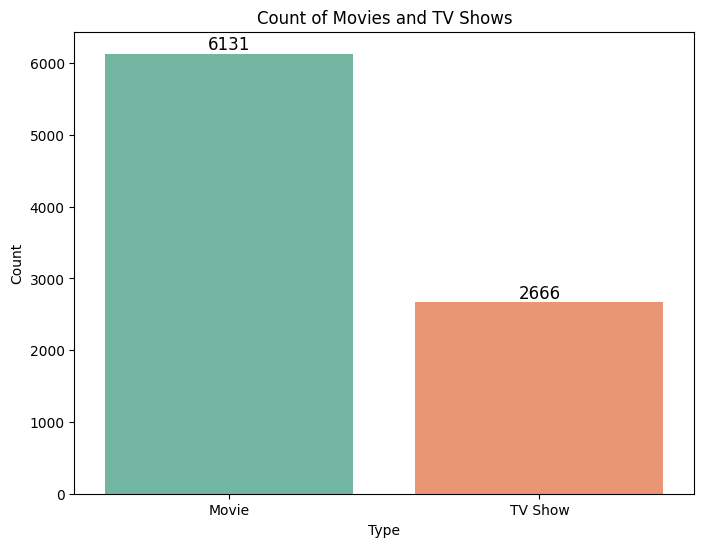

In [ ]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='type', palette='Set2')

# Calculate and annotate the counts
counts = df['type'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

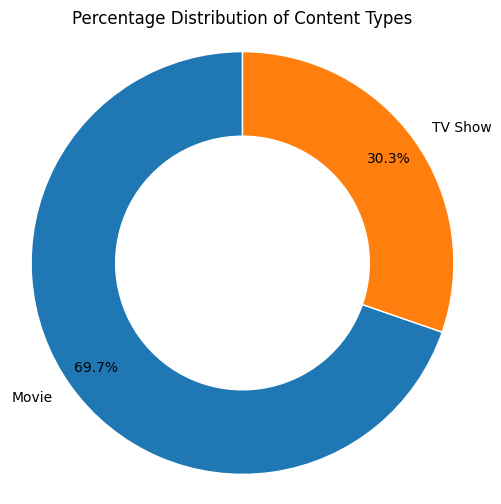

In [ ]:
# Calculate the content type counts
type_counts = df['type'].value_counts()

# Create a donut plot
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle in the center to make it a donut plot
center_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title
plt.title('Percentage Distribution of Content Types')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

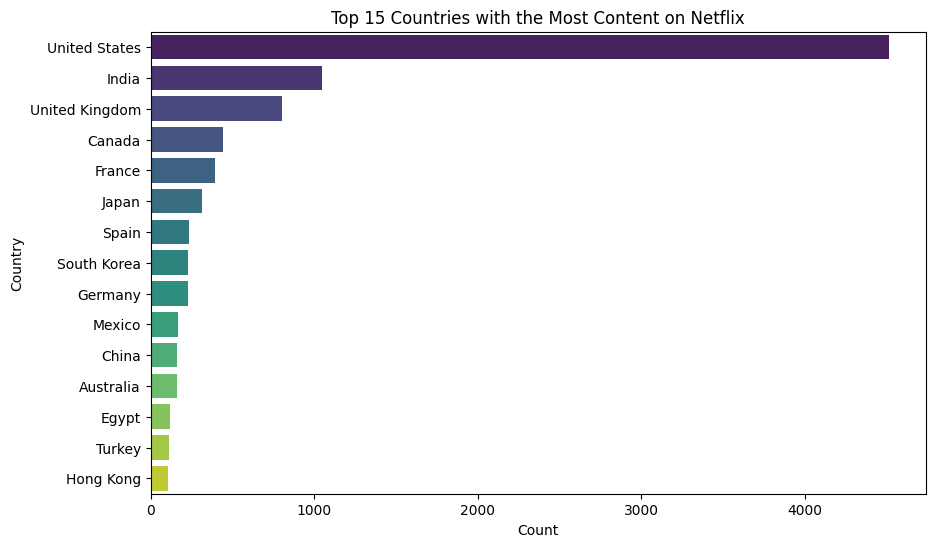

In [ ]:
# Calculate the country counts
country_counts = df_country['country'].value_counts().head(15)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 15 Countries with the Most Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


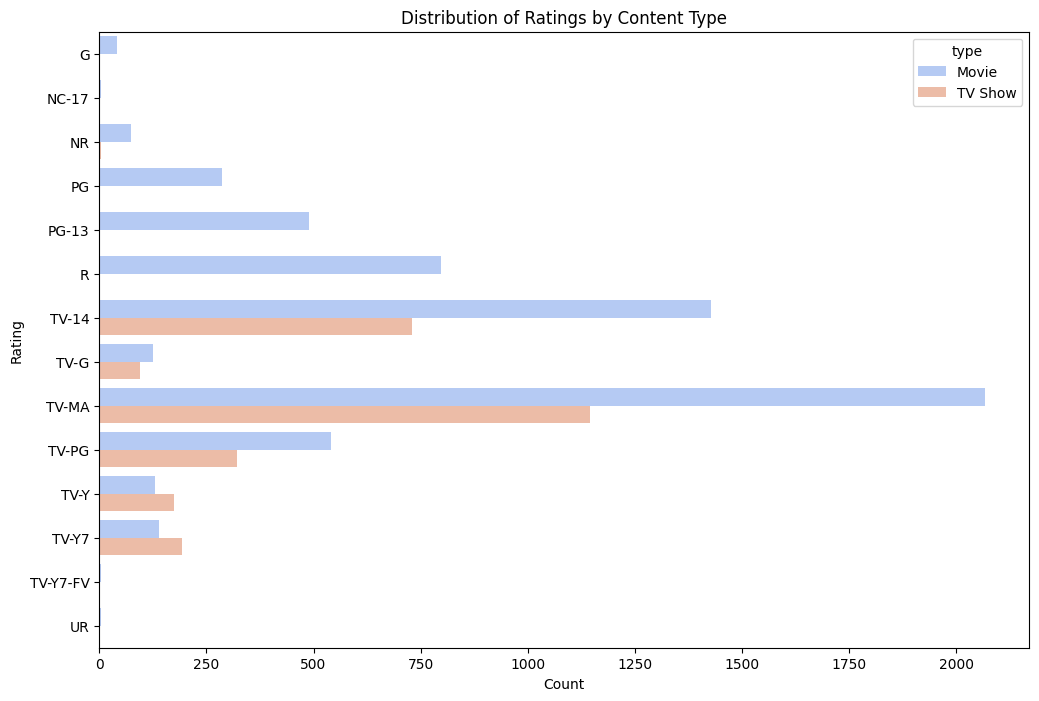

In [ ]:
# Calculate the rating counts and sort in descending order
rating_counts = df.groupby(['type', 'rating'])['show_id'].count().sort_values(ascending=False).reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=rating_counts['show_id'], y=rating_counts['rating'], hue=rating_counts['type'], palette='coolwarm')
plt.title('Distribution of Ratings by Content Type')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


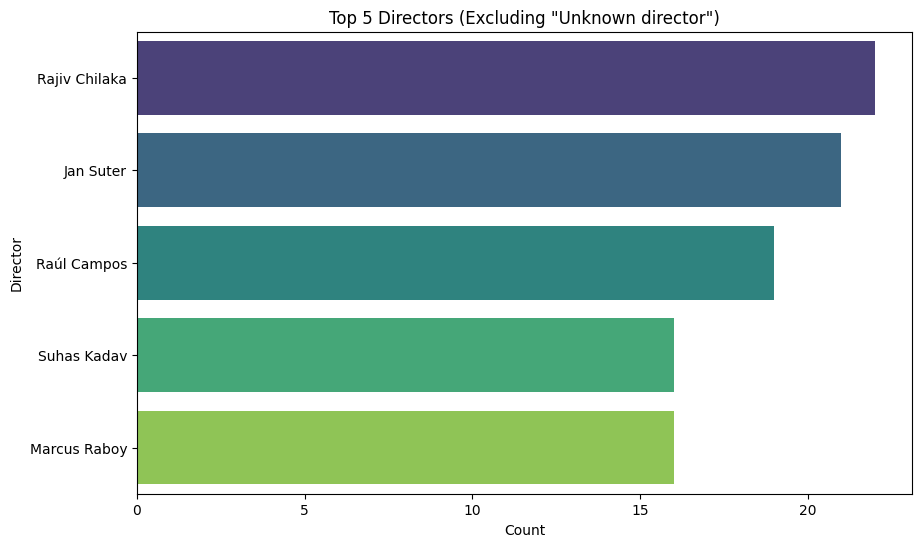

In [ ]:
# Exclude 'Unknown director' from the counts
director_counts = director_counts[director_counts.index != 'Unknown director']
# Set the number of top directors to display
top_n = 5
# Create a horizontal bar plot for the top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.head(top_n), y=director_counts.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Directors (Excluding "Unknown director")')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


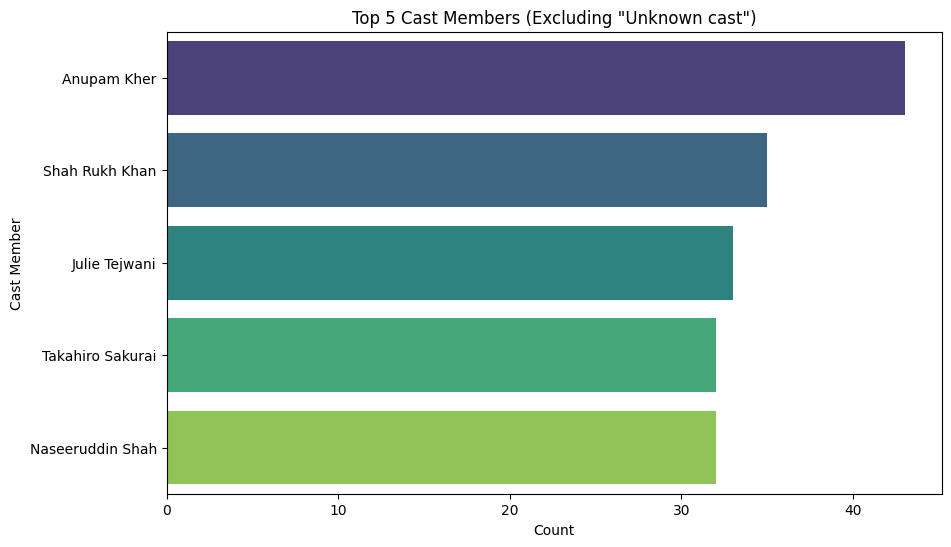

In [ ]:
# Remove "Unknown cast" from the cast_counts Series
cast_counts = cast_counts[cast_counts.index != "Unknown cast"]

# Set the number of top cast members to display
top_n = 5
plt.figure(figsize=(10, 6))
sns.barplot(x=cast_counts.head(top_n).values, y=cast_counts.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Cast Members (Excluding "Unknown cast")')
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.show()





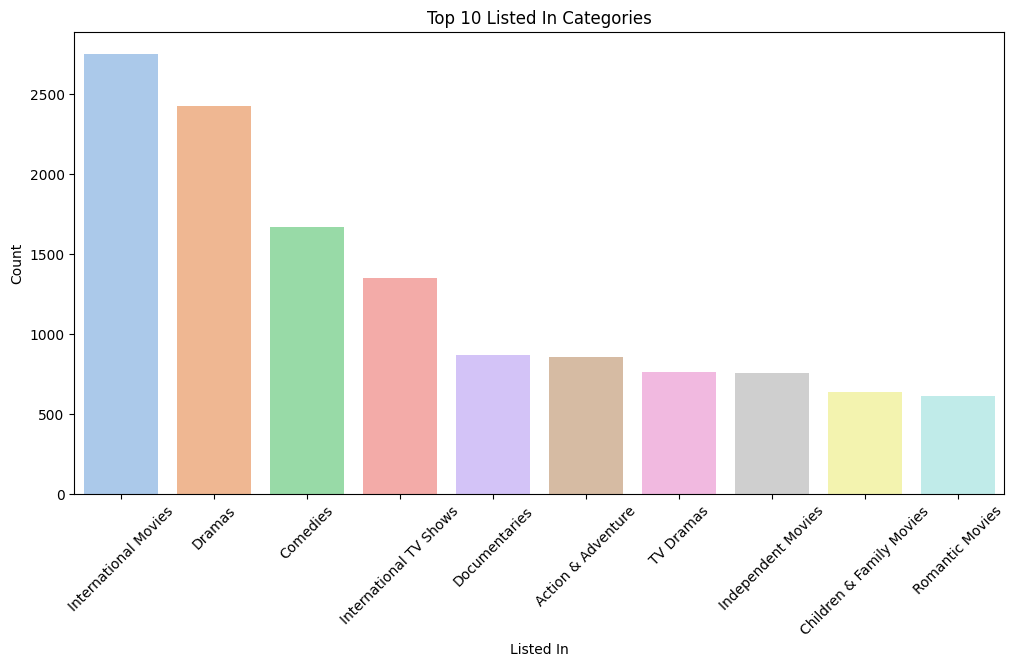

In [ ]:
# Sort the DataFrame by count in descending order
df_listed_in_counts = df_listed_in_counts.sort_values(by='Count', ascending=False)

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_listed_in_counts.head(10), x='Listed In', y='Count', palette='pastel')
plt.title('Top 10 Listed In Categories')
plt.xlabel('Listed In')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Comparison of tv shows vs. movies.**

In [ ]:
# Create a copy of the DataFrame and split/explode the 'country' column
df_copy = df.copy()
df_copy['country'] = df_copy['country'].str.split(', ')

# Create separate rows for each country and type (Movie/TV Show)
df_split = df_copy.explode('country')

# Find the number of unique titles for each country and type
country_movie_counts = df_split[df_split['type'] == 'Movie'].groupby('country')['title'].nunique()
country_tv_show_counts = df_split[df_split['type'] == 'TV Show'].groupby('country')['title'].nunique()

# Find the top 10 countries for movies and TV shows
top_10_movie_countries = country_movie_counts.sort_values(ascending=False).head(10)
top_10_tv_show_countries = country_tv_show_counts.sort_values(ascending=False).head(10)

print("Top 10 countries for movies:")
print(top_10_movie_countries)

print("\nTop 10 countries for TV shows:")
print(top_10_tv_show_countries)

Top 10 countries for movies:
country
United States     3191
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: title, dtype: int64

Top 10 countries for TV shows:
country
United States     1322
United Kingdom     271
Japan              198
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           65
Spain               61
Name: title, dtype: int64


**Analysis:**Above findings indicate that the United States is the top producer of both movies and TV shows on Netflix. India also has a significant presence in the top countries for movies, while Japan is prominent in the list for TV shows.

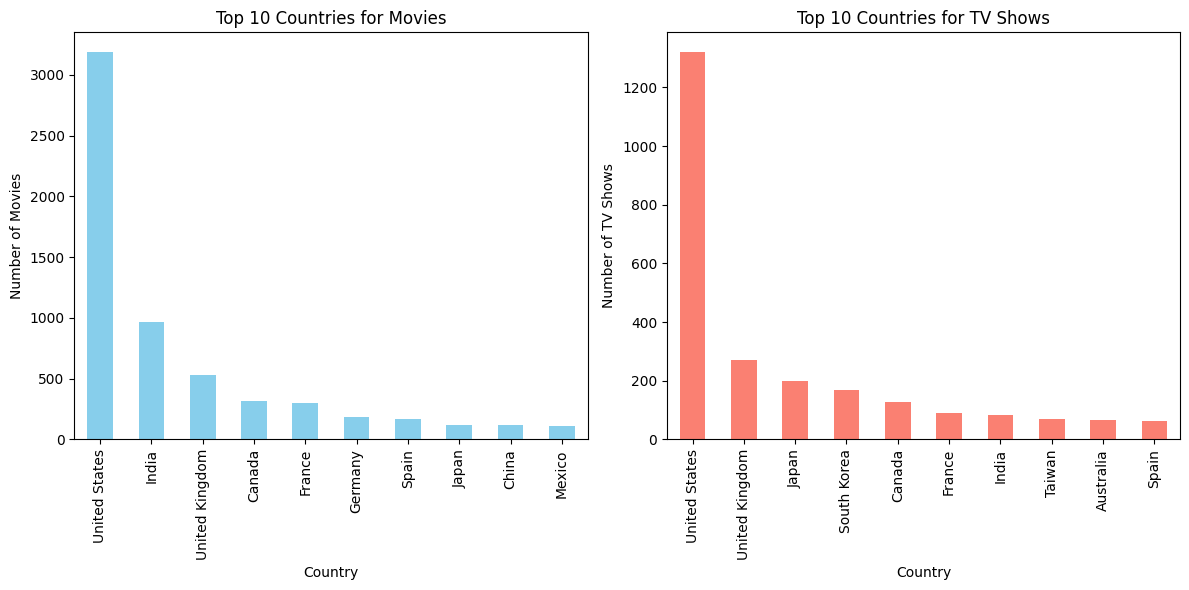

In [ ]:
# Plot the results for movies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_10_movie_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries for Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')

# Plot the results for TV shows
plt.subplot(1, 2, 2)
top_10_tv_show_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries for TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()

**Recommendations:**
**1.Localize Content:** Customize content for local audiences, especially in India.

**2.Diversify U.S. Catalog:** Ensure a broad range of content to cater to the diverse U.S. market.

**3.Co-Production Ventures:** Explore partnerships with top-producing countries for unique shows and movies.

**4.Accessibility Features:** Enhance accessibility with subtitles and dubbing options.

**5.Expand in Emerging Markets:**Target growth markets like South Korea and China.

**6.Cultural Adaptation:** Modify content to align with local cultures and preferences.

**What is the best time to launch a TV show?**

In [ ]:
'''Find which is the best week to release the Tv-show or the movie.'''
# Group by 'week_added' and 'type' and count the number of TV shows and movies
week_counts = df.groupby(['week_added', 'type'])['show_id'].count().reset_index()

# Find the best week for TV Shows
best_tv_show_week = week_counts[week_counts['type'] == 'TV Show'].sort_values('show_id', ascending=False).iloc[0]

# Find the best week for Movies
best_movie_week = week_counts[week_counts['type'] == 'Movie'].sort_values('show_id', ascending=False).iloc[0]

print("Best week for TV Shows:", best_tv_show_week['week_added'])
print("Best week for Movies:", best_movie_week['week_added'])

Best week for TV Shows: 27
Best week for Movies: 1


**Analysis:**

****Best Week for TV Shows (Week 27):***

**Summer Breaks:** Week 27 typically falls during the summer months, which is a time when many people have more leisure time for binge-watching TV shows. Students are on summer break, and families often plan vacations, creating opportunities for viewers to catch up on TV series.

****Best Week for Movies (Week 1):***
1.Awards season and holiday season momentum.

2.Cold weather encourages indoor activities.

**Recommendations:**

**1.Prime TV Show Week (Week 27):** Opt for TV show releases during the summer break for increased viewer availability and less competition.

**2.Perfect Movie Release Timing (Week 1):** Choose Week 1, the start of the year, for movies. Capitalize on New Year motivation and the buzz from awards and holidays.

**3.Harness Seasonal Themes:** Enhance audience engagement by aligning content with seasonal themes, like summer adventures or New Year reflections, during optimal weeks.

In [ ]:
''' Find which is the best month to release the Tv-show or the movie.'''
# Group by 'month_added' and 'type' and count the number of TV shows and movies
month_counts = df.groupby(['month_added', 'type'])['show_id'].count().reset_index()

# Find the best month for TV Shows
best_tv_show_month = month_counts[month_counts['type'] == 'TV Show'].sort_values('show_id', ascending=False).iloc[0]

# Find the best month for Movies
best_movie_month = month_counts[month_counts['type'] == 'Movie'].sort_values('show_id', ascending=False).iloc[0]

print("Best month for TV Shows:", best_tv_show_month['month_added'])
print("Best month for Movies:", best_movie_month['month_added'])


Best month for TV Shows: 12
Best month for Movies: 7


**Analysis:**

**December (Best Month for TV Shows):**

**1.Holiday Season:** December is synonymous with the holiday season, which means people have more leisure time and are looking for entertainment options.

**2.Family Gatherings:** Families often come together during the holidays, creating a conducive environment for family-oriented TV shows.

**3.Colder Weather:** In many regions, December marks the start of winter, leading people to spend more time indoors and watch TV.

**4.Awards Season:** Major awards shows like the Golden Globes and the Oscars kick off in December generating interest in TV shows that are contenders.

**July (Best Month for Movies):**

**1.Summer Blockbusters:** July is the peak of the summer movie season, with studios releasing big-budget blockbusters to maximize box office revenue.

**2.School Vacations:** July often aligns with school summer vacations, leading families and young adults to seek entertainment options.

**3.Outdoor Activities:** Warm weather and longer daylight hours encourage outdoor activities, making indoor entertainment like movies a popular choice.

**Recommendations for TV Shows in December:**

1.Release holiday-themed and family-friendly content.

2.Time the release of potential award contenders to coincide with awards season.

3.Offer a diverse range of genres to cater to various audience preferences.

**Recommendations for Movies in July:**

1.Summer-Themed Films: Produce movies with summer-related storylines, embracing the season's spirit and activities.

2.Collaborative Promotions: Partner with complementary brands (e.g., ice cream, beachwear) for joint marketing campaigns to enhance audience engagement.

3.Fan Involvement: Engage fans through contests, Q&A sessions, and fan-generated content to build anticipation and community around the movie release.

**Analysis of actors/directors of different types of shows/movies.**

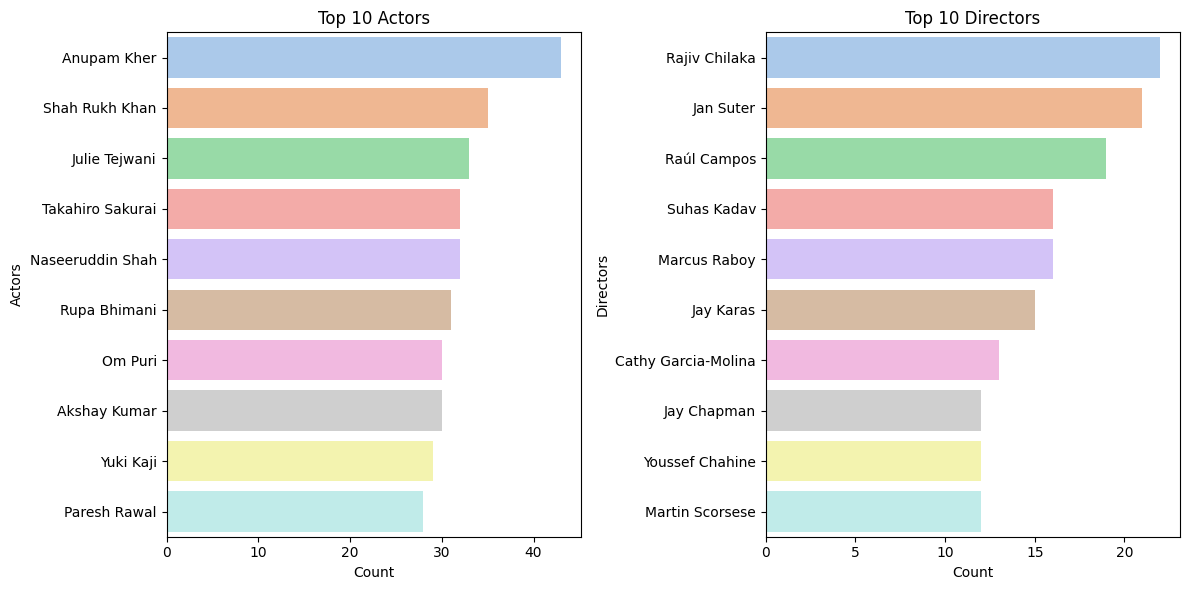

In [ ]:
# Remove the 'Unknown' entries
df_cast = df_cast[df_cast['cast'] != 'Unknown cast']
df_director = df_director[df_director['director'] != 'Unknown director']

# Get the top 10 actors who appeared in the most titles
top_actors = df_cast['cast'].value_counts().nlargest(10)

# Get the top 10 directors who appeared in the most titles
top_directors = df_director['director'].value_counts().nlargest(10)

# Create bar plots using Seaborn
plt.figure(figsize=(12, 6))

# Plot the top 10 actors
plt.subplot(1, 2, 1)
sns.barplot(x=top_actors.values, y=top_actors.index, palette='pastel')
plt.title('Top 10 Actors')
plt.xlabel('Count')
plt.ylabel('Actors')

# Plot the top 10 directors
plt.subplot(1, 2, 2)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='pastel')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Directors')

plt.tight_layout()
plt.show()

**Analysis:**

1.Anupam Kher is the actor who has appeared in the most titles shows among the top ten actors.

2.Shah Rukh Khan follows closely behind Anupam Kher in terms of appearances.

3.Rajiv Chilaka seems to have directed the most content in the Netflix library and "Rajiv Chilaka" is the most famous director among all followed by Jan Suter.

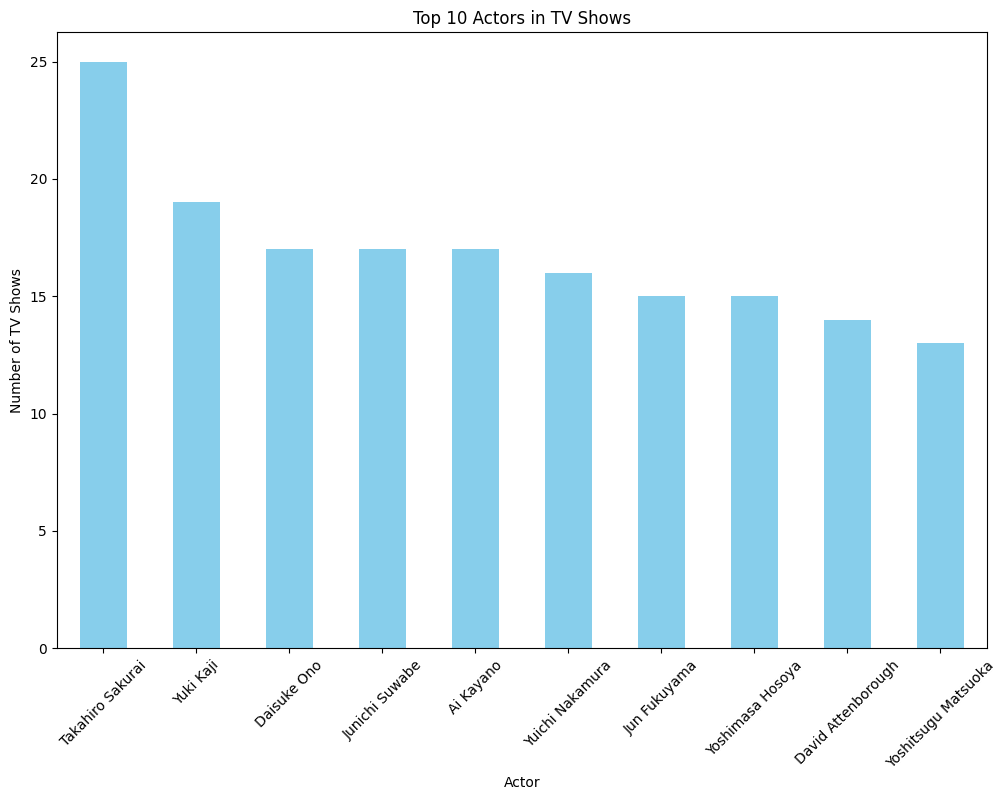

In [ ]:
# Filter the DataFrame to include only TV Shows
df_tv_shows = df[df['type'] == 'TV Show']

# Get the top 10 actors who appeared in the most TV Shows
top_actors_tv = df_cast[df_cast['type'].isin(df_tv_shows['type'])]['cast'].value_counts().nlargest(10)

#  Create a bar plot for the top 10 actors in TV shows
plt.figure(figsize=(12, 8))
top_actors_tv.plot(kind='bar', color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Number of TV Shows')
plt.title('Top 10 Actors in TV Shows')
plt.xticks(rotation=45)
plt.show()

**Analysis:**
*Takahiro Sakurai* holds the highest number of titles among Netflix TV Shows, making him the top actor in this category.

**Which genre is more popular or produced more?**

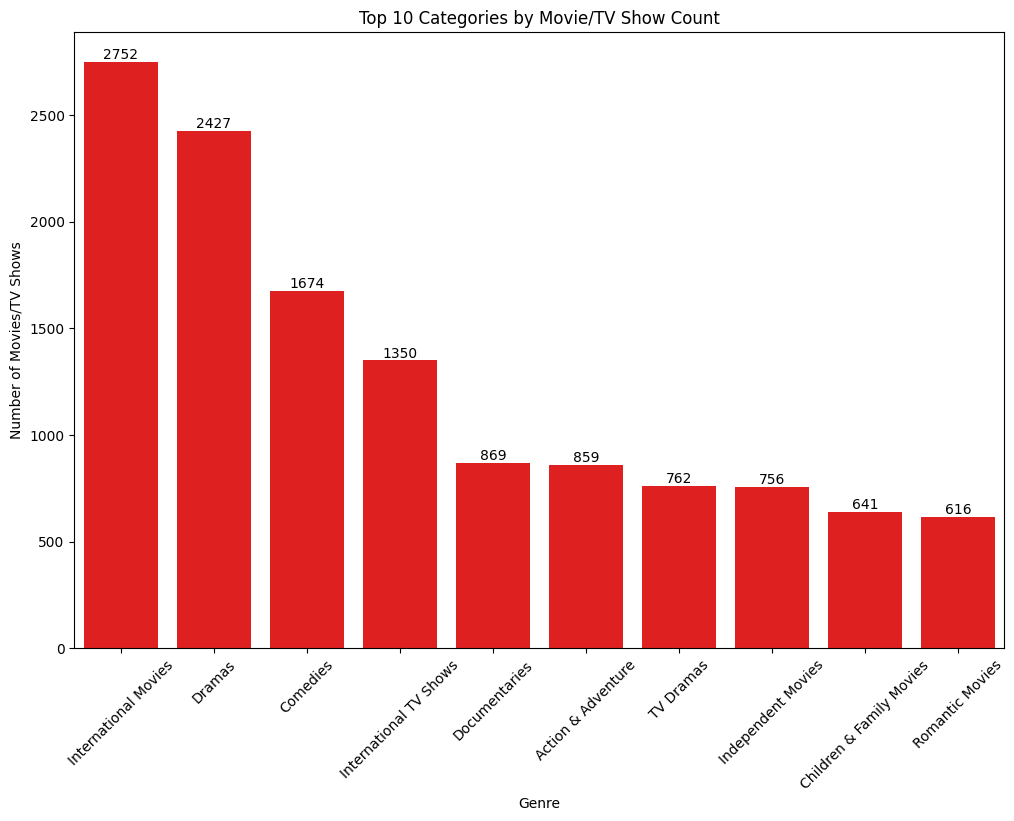

In [ ]:
#  removing leading and trailing whitespaces from the values in the 'listed_in' column
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()

# Count the occurrences of each actor
listed_in_counts = df_listed_in['listed_in'].value_counts()

# Select the top 10 actors
top_10_listed_in = listed_in_counts.head(10)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_10_listed_in.index, y=top_10_listed_in.values, color='red')

# Customize the plot
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Categories by Movie/TV Show Count')
plt.xticks(rotation=45)

# Add count values on top of each bar
for index, value in enumerate(top_10_listed_in.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

**Analysis:**


*   
International Movies (2752): With a staggering count, international movies dominate the platform, the platform boasts a vast collection of international films, showcasing a global cinematic palette for diverse audiences.


*   Dramas (2427): The enduring popularity of dramas highlights viewers' fascination with emotionally charged storytelling and character-driven narratives.



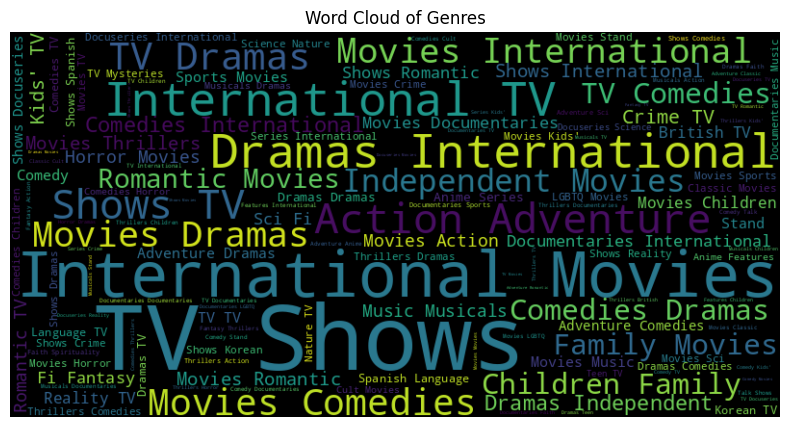

In [ ]:
# wordcloud of Genres
from wordcloud import WordCloud

# Combine genre data into a single text corpus
genre_text = ' '.join(df_listed_in['listed_in'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(genre_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

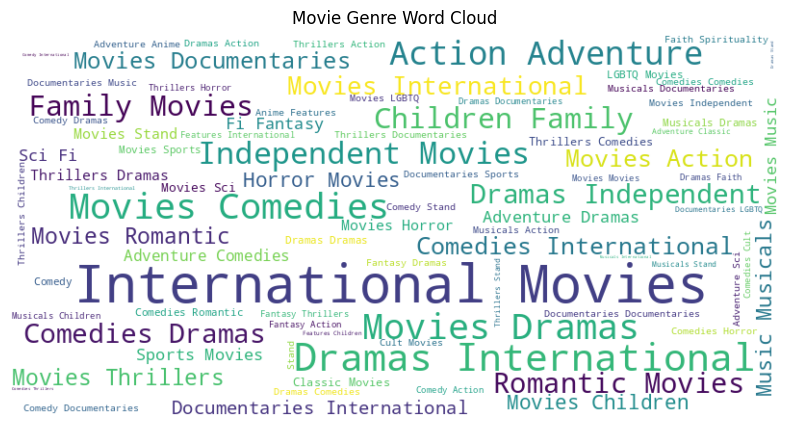

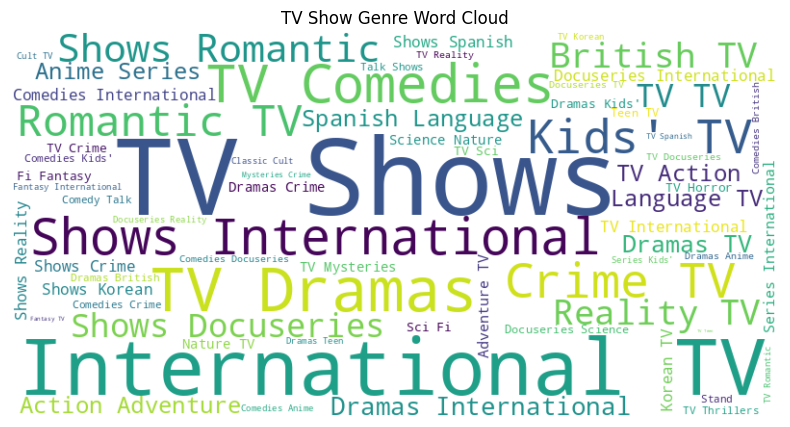

In [ ]:
'''Separate Word Clouds for Genres of Movies and Genres of Tv Shows'''
# Separate data into Movie and TV Show categories
movie_data = ' '.join(df_listed_in['listed_in'][i] for i, t in enumerate(df_listed_in['type']) if t == 'Movie')
tv_show_data = ' '.join(df_listed_in['listed_in'][i] for i, t in enumerate(df_listed_in['type']) if t == 'TV Show')

# Create WordCloud objects for Movie and TV Show genres
movie_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_data)
tv_show_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tv_show_data)

# Display the Movie Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(movie_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genre Word Cloud')
plt.show()

# Display the TV Show Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(tv_show_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TV Show Genre Word Cloud')
plt.show()

**Genre Correlation Heatmap**

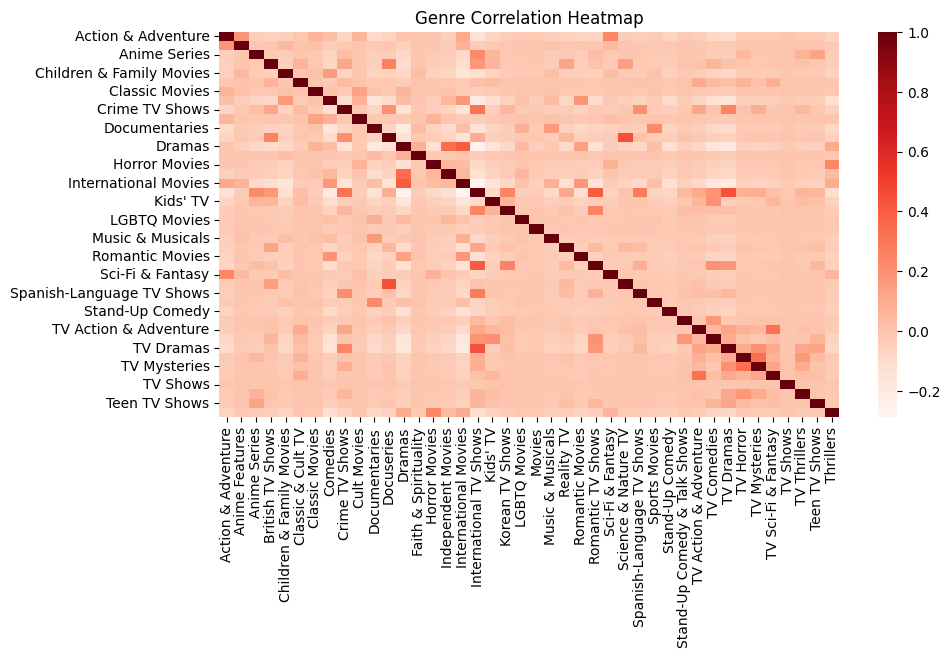

In [ ]:
# Split the 'listed_in' column into individual genres and create a binary-encoded DataFrame
genre_data = df['listed_in'].str.get_dummies(', ')

# Calculate the correlation matrix
correlation_matrix = genre_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap='Reds', annot=False)

# Customize the plot
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

The heatmap illustrates the relationships between various genres. Through an examination of the heatmap, we can discern robust positive associations among certain genres, such as TV Dramas and International TV Shows, as well as Romantic TV Shows and International TV Shows.

**Most Common Words in Titles and Descriptions**

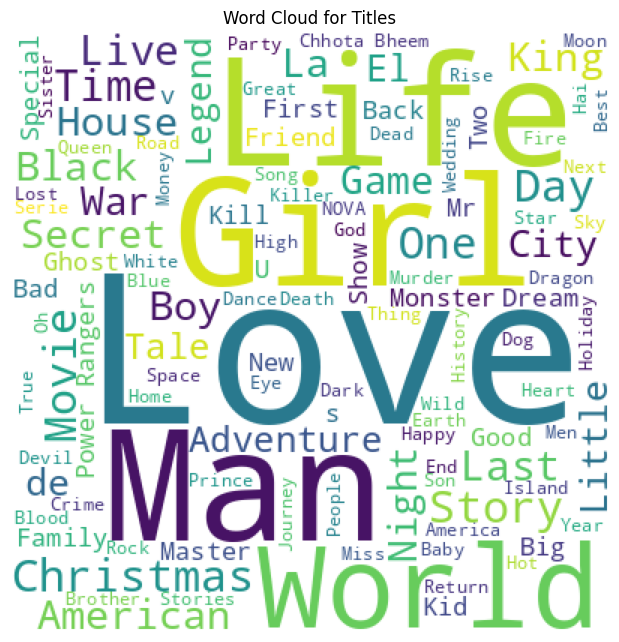

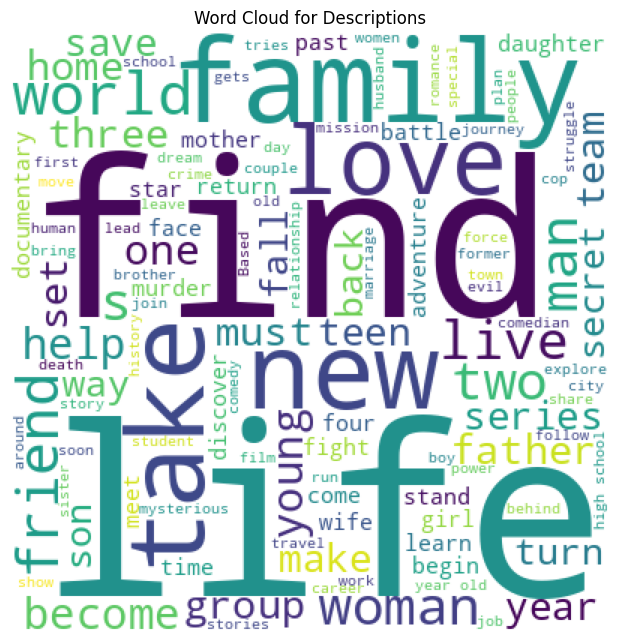

In [ ]:
# Function to create and display a Word Cloud
def create_wordcloud(text, title, width=400, height=400):
    wordcloud = WordCloud(width=width, height=height,
                          background_color='white',
                          min_font_size=10).generate(text)

    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

# Concatenate all the titles into a single string
title_text = ' '.join(df['title'])
create_wordcloud(title_text, 'Word Cloud for Titles', width=400, height=400)

# Concatenate all the descriptions into a single string
description_text = ' '.join(df['description'])
create_wordcloud(description_text, 'Word Cloud for Descriptions', width=400, height=400)

**Analysis:**

1.Reviewing the word cloud generated from titles, we can identify common terms like "Love," "Girl," "Man," "Life," and "World," implying the prevalence of romantic, coming-of-age, and drama genres within Netflix's content selection.

2.Exploring the word cloud created from descriptions, we observe prominent words like "life," "find," and "family," indicating themes related to personal journeys, relationships, and family dynamics that are prominent in Netflix's content offerings.

**Find after how many days the movie,tv show will be added to Netflix after the release of**
**the movie**

In [ ]:
# Calculate the difference in days between 'date_added' and 'release_year'
df['days_to_add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Calculate the mode (most common) of the 'days_to_add' column separately for movies and TV shows
mode_days_to_add_movie = df[df['type'] == 'Movie']['days_to_add'].mode().values[0]
mode_days_to_add_tv_show = df[df['type'] == 'TV Show']['days_to_add'].mode().values[0]

print("Mostly Movies are added after:", mode_days_to_add_movie,"days")
print("Mosly Tv Shows are added after:", mode_days_to_add_tv_show,"days")

Mostly Movies are added after: 334 days
Mosly Tv Shows are added after: 364 days


**Movies & TV Shows Added Over Time**

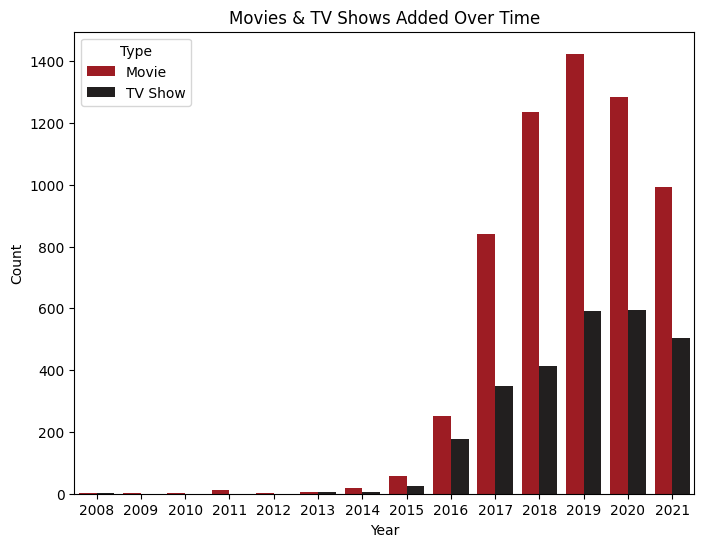

In [ ]:
# Create a plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='year_added', hue='type', palette={'Movie': '#b20710', 'TV Show': '#221f1f'})
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend(title='Type')
plt.show()

**Analysis:**
The above plot provides a visual representation of the increase in the quantity of movies and TV shows added to Netflix as time progressed. It highlights the evolution and patterns in content additions, displaying distinct lines for both movies and TV shows.

Netflix experienced significant expansion beginning in 2015, with a notable observation that it incorporated a higher number of movies compared to TV shows throughout the years.

It's also noteworthy that there was a decline in content additions in the year 2020, which could potentially be attributed to the impact of the pandemic.

**Duration Distribution for Movies and TV Shows**

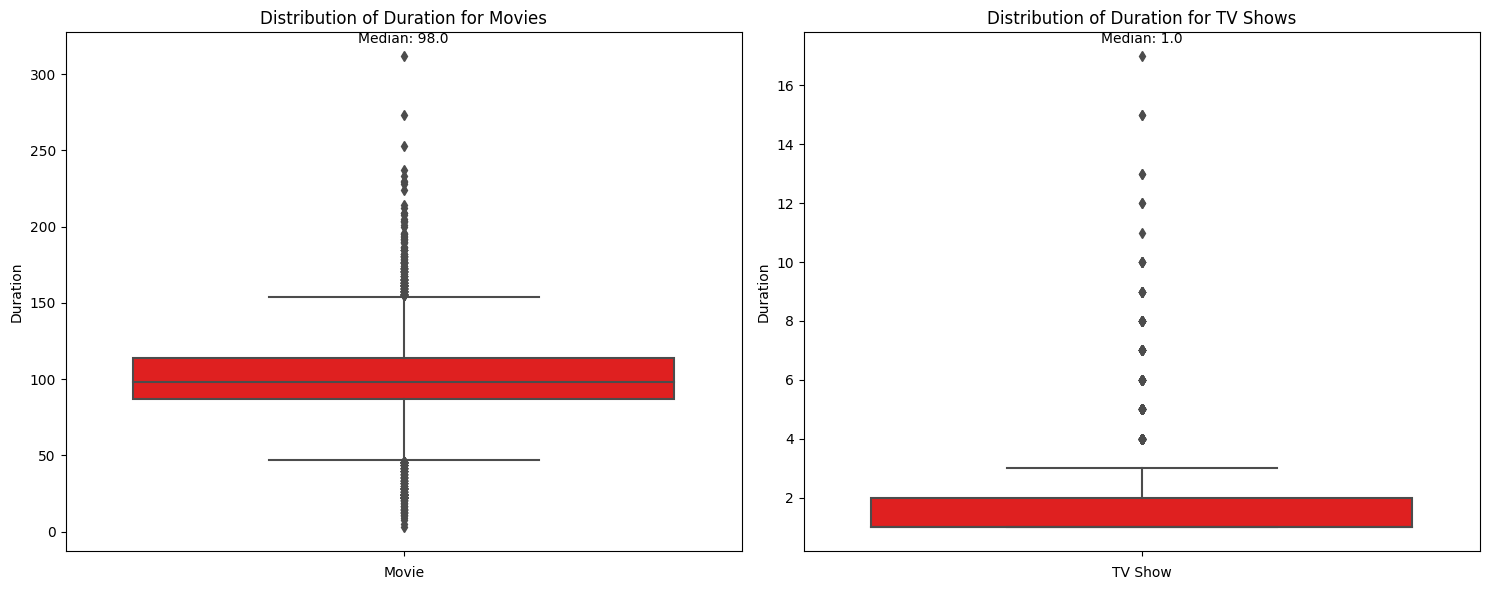

In [ ]:
# Separate the DataFrame into movies and TV shows
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

# Extracting and converting the duration for movies
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)

# Extracting and converting the duration for TV shows
df_tv_shows['duration'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

# Create subplots
plt.figure(figsize=(15, 6))

# Create subplot for movie duration
plt.subplot(1, 2, 1)
sns.boxplot(data=df_movies, y='duration', color='red')  # Use y='duration' to plot duration on the y-axis
plt.xlabel('Movie')  # Update x-axis label to 'Movie'
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.annotate('Median: ' + str(df_movies['duration'].median()), xy=(0.5, 0.98), xycoords='axes fraction',
                 ha='center', fontsize=10)

# Create subplot for TV show duration
plt.subplot(1, 2, 2)
sns.boxplot(data=df_tv_shows, y='duration', color='red')  # Use y='duration' to plot duration on the y-axis
plt.xlabel('TV Show')  # Update x-axis label to 'TV Show'
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.annotate('Median: ' + str(df_tv_shows['duration'].median()), xy=(0.5, 0.98), xycoords='axes fraction',
                 ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**Analysis:**

1.Movie Durations: Netflix predominantly offers movies with durations ranging from 50 to 150 minutes, catering to standard viewing preferences. However, there are occasional outliers with longer durations.

2.TV Show Formats: Netflix's TV show catalog primarily includes series spanning one to three seasons, in alignment with the binge-watching trend. Some exceptions have longer durations, which can be considered outliers.

**Popularity of Top 10 Listed_In Categories in Top 10 Countries**

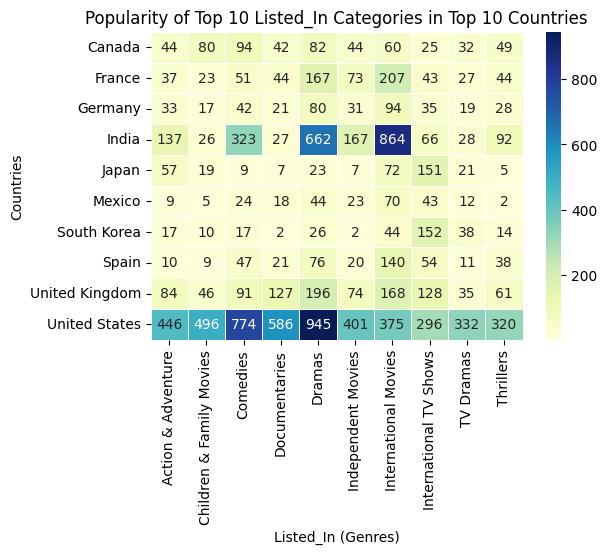

In [ ]:
# Merge the data frames on the "show_id" column
merged_df = pd.merge(df_country, df_listed_in, on="show_id")

# Get the top 10 countries and listed_in values based on their count
top_10_countries = merged_df['country'].value_counts().head(10).index
top_10_listed_in = merged_df['listed_in'].value_counts().head(10).index

# Filter the data frame to include only the top 10 countries and top 10 listed_in values
filtered_df = merged_df[merged_df['country'].isin(top_10_countries) & merged_df['listed_in'].isin(top_10_listed_in)]

# Create a pivot table to count the occurrences of each combination of country and listed_in values
pivot_table = filtered_df.pivot_table(index='country', columns='listed_in', values='show_id', aggfunc='count', fill_value=0)

# Create a heatmap to show the counts of listed_in categories in each country
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('Popularity of Top 10 Listed_In Categories in Top 10 Countries')
plt.xlabel('Listed_In (Genres)')
plt.ylabel('Countries')
plt.show()

**Analysis:**
A more in-depth analysis reveals that the genre "International Movies" enjoys significant popularity in India. Meanwhile, in the United States, dramas emerge as the most favored genre, followed by India. Furthermore, it is noteworthy that the United States exhibits a broader and robust affinity for various genres, showcasing a diverse audience taste.

**Recommendations:**

**1.Leverage the International Movies Genre in India:** Given the strong preference for "International Movies" in India, content providers and platforms should consider expanding their offerings in this genre. Acquiring or producing content from various countries and cultures can help cater to this demand.

**2.Highlight Dramas in the United States:** Since dramas are highly popular in the United States, content creators and streaming services should continue to emphasize this genre. Developing compelling drama series and movies could attract and retain a significant audience.

**3.Diverse Content for the U.S. Audience:** While the United States has a diverse taste in genres, it's essential to offer a wide range of content to cater to different viewer preferences. Consider curating a diverse library that includes genres such as action, comedy, documentaries, and more to engage a broader audience.



**listed_in(Genre) proportion of total content by country**

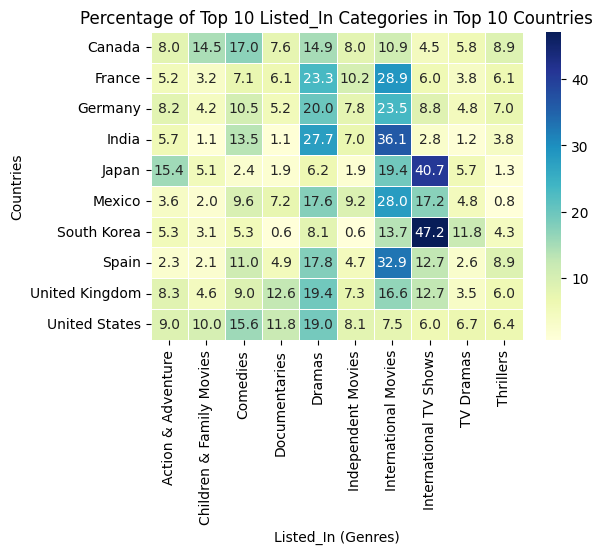

In [ ]:
# Calculate row-wise percentages
row_sums = pivot_table.sum(axis=1)
percentage_table = pivot_table.div(row_sums, axis=0) * 100

# Create a heatmap to show the percentages of listed_in categories in each country
plt.figure(figsize=(6, 4))
sns.heatmap(percentage_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Percentage of Top 10 Listed_In Categories in Top 10 Countries')
plt.xlabel('Listed_In (Genres)')
plt.ylabel('Countries')
plt.show()

**Analysis:**

**1.Dramas:** Dramas are the most popular genre among the top 10 countries.

**2.International Movies:** Following dramas, international movies hold a prominent position in terms of popularity.

**3.International TV Shows:** International TV shows are also highly popular, making them the third most favored genre among these countries

**Recommendations:**

**1.Diversify Dramas:** Expand the range of drama content to cater to diverse viewer preferences.

**2.Enhance International Movies:** Offer a broad selection of international films to satisfy global audiences.

**3.Invest in TV Shows:** Focus on international TV shows, considering dubbing or subtitling for wider accessibility.

# **Summary of Key Findings:**

**Release Year Distribution:** The dataset contains a wide range of release years,
with movies and TV shows spanning from before 2013 to the most recent releases in 2021. The median release year is 2017, indicating a mix of older and newer content.

**Content Analysis by Country:** The United States is the top producer of content on Netflix, followed by India and the United Kingdom. However, the dataset includes content from 127 unique countries, reflecting Netflix's global reach.

**Content Ratings:** The 'TV-MA' rating is the most common for both movies and TV shows on Netflix, followed by 'TV-14.' Ratings like 'G' and 'NC-17' are relatively rare.

**Director and Cast Analysis:** The dataset reveals that many entries have "Unknown director" or "Unknown cast," indicating missing information. Among known directors, Rajiv Chilaka and Jan Suter have directed the most content. Anupam Kher and Shah Rukh Khan are among the frequently appearing actors.

**Genre Distribution:** "International Movies" and "Dramas" are the dominant genres on Netflix.

**Country-Specific Analysis:** The United States leads in producing both movies and TV shows, with India also having a strong presence in movie production, and Japan excelling in TV show production.

**Content Duration:** Movies on Netflix primarily fall within the range of 50 to 150 minutes, while TV shows are typically one to three seasons long.

**Impact of COVID-19:** In 2021, there was a significant drop in content additions, likely due to the COVID-19 pandemic affecting production schedules.

# **Recommendations:**

**Movies:**

**1.Optimal Movie Duration:** Continue producing movies with durations between 90-100 minutes, as this aligns with viewer preferences.

**2.Regional Focus:** Invest in more movie content tailored for the United States and India, particularly in the genres of International Movies and Comedies.

**3.Rating-Driven Content:** Prioritize creating movies with TV-MA and TV-14 ratings, as these are the most common ratings for Netflix content.

**4.Content Localization:** Explore region-specific content for countries with growing viewership like India and the United Kingdom.

**TV Shows:**

**1.Seasonal TV Shows:** Focus on producing TV shows with 1-2 seasons, as this aligns with viewer preferences.

**2.Target Specific Markets:** Concentrate on markets like Japan, South Korea, and France, where TV shows have strong appeal. Tailor content to suit regional tastes.

**3.Pandemic Preparedness:** Develop contingency plans for content production and release in case of future disruptions like pandemics.

**4.Leverage Work-from-Home Trends:** Given the rise in TV show popularity during remote work scenarios, continue to produce engaging web series.

**Content Strategy:**

**1.Content Age Diversity:** Consider adding older content to cater to senior audiences who may prefer classic titles.

**2.Diverse Ratings:** While catering to mature and teen audiences is essential, explore opportunities to expand content for younger viewers with appropriate parental guidance.

**3.Genre Expansion:** While popular genres are essential, don't neglect niche genres to attract diverse viewers.

**4.Global Content Promotion:** Promote diverse content, including International Movies and TV Shows, to attract a broad audience.

**5.Market Expansion:** Explore opportunities to increase content from more countries, focusing on regions with untapped potential.

**6.Content Duration Trends:** Monitor viewer preferences for content duration and align new content production accordingly.

**7.Pandemic Resilience:** Develop strategies to ensure a steady flow of content during unforeseen disruptions, learning from the pandemic experience.